# Dielectricos y conductores

La ecuación para el campo eléctrico incidente de una onda polarizada linealmente para medios dieléctricos y conductores puede expresarse como:
<br><br>
$$\large E(z,t) = e^{-\alpha z} cos(\omega t - \beta z)$$<br>
$$\large \gamma = \alpha + j\, \beta$$ <br>
donde:
$$\alpha = \frac{\omega \sqrt{\mu \epsilon}}{\sqrt{2}} \left(\sqrt{1 + \left(\frac{\sigma}{\omega \epsilon}\right)^2}-1 \right)^{1/2}$$

$$\beta = \frac{\omega \sqrt{\mu \epsilon}}{\sqrt{2}} \left(\sqrt{1 + \left(\frac{\sigma}{\omega \epsilon}\right)^2}+1 \right)^{1/2}$$

- $\gamma$ es la constante de propagación de la onda [1/m] <br>
- $\alpha$ es la constante de atenuación de la onda [1/m] <br>
- $\beta$ es la constante de fase de la onda [rad/m] 
- $\omega$ es la frecuencia angular de la señal [rad/s] <br>
- $\sigma$ es la conductividad <br>
- $\epsilon$ es la permitividad del medio <br>
- $\mu$ es la permeabilidad del medio

Otras ecuaciones:

$$\large v = \lambda \, f = \frac{\omega}{\beta}$$<br>
$$\large \beta = \frac{2 \, \pi}{\lambda}$$<br>
$$\large \delta = \frac{1}{\alpha}$$
donde: <br>
- $v$ es la velocidad de propagación de la onda [m/s]<br>
- $\lambda$ es la longitud de onda [m] <br>
- f es la frecuencia de la onda [Hz] <br>
- $\delta$ es la profundidad de penetración [m] <br>

Para calcular las características de propagación de las ondas, primero debe determinarse si el medio se comporta como buen dieléctrico o buen conductor.
Esto se realiza calculando la **tangente de pérdidas**:
$$\large tan \, \delta = \frac{\sigma}{\omega \epsilon}$$
El valor de la tangente de perdidas determinará el comportamiento del material, si:
- $tan \, \delta > 100$ el material se comporta como buen conductor <br>
- $tan \, \delta < 1/100$ el material se comporta como buen dieléctrico <br>
- En otro caso el material se comporta como buen semiconductor.

A continuación, para diferentes materiales, se graficará el Campo Eléctrico y se calcularán algunos valores.
Para esto inicializaremos algunas variables:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

e0 = 8.85e-12;
u0 = 1.26e-6;

## Buen conductor
Una onda de RF a través del cobre:
- Frecuencia 1 GHz
- $\epsilon r = 1$
- $\mu r = 1$
- $\sigma = 5.8x10^7$ [S/m]

In [2]:
f = 1e9;
er = 1;
ur = 1;
sigma = 3e7;

Algunos parámetros de la onda:

In [3]:
omega = 2*np.pi*f;
e = e0*er;
u = u0*ur;
tand = sigma/(omega*e);
alpha = omega*np.sqrt(u*e/2)*np.sqrt(np.sqrt(1+tand**2)-1);
beta  = omega*np.sqrt(u*e/2)*np.sqrt(np.sqrt(1+tand**2)+1);
lambd = 2*np.pi/beta;
v = lambd*f;

print('tand  :',tand)
print('alpha :',alpha,' 1/m')
print('beta  :',beta, ' rad/m')
print('lambd :',lambd, ' m')
print('v     :',v, ' m/s')

tand  : 539508281.6674418
alpha : 344604.4139090245  1/m
beta  : 344604.4145477625  rad/m
lambd : 1.8233037772964254e-05  m
v     : 18233.037772964253  m/s


La gráfica del campo eléctrico en función de la distancia:

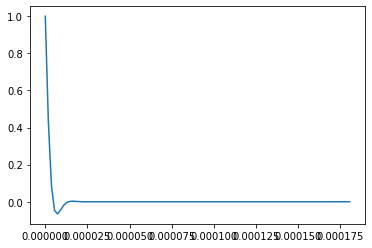

In [4]:
z = np.arange(0,10*lambd,lambd/10);
Ezp = np.exp(-alpha*z)*np.cos(-beta*z);
plt.plot(z, Ezp);

## Buen dieléctrico
Una onda de RF a través de polietileno:
- Frecuencia 1 kHz
- $\epsilon r = 2.6$
- $\mu r = 1$
- $tand = 0.20x10^{-3}$

In [5]:
f = 1e3;
er = 1;
ur = 1;
tand = 0.2e-3;

Algunos parámetros de la onda:

In [6]:
omega = 2*np.pi*f;
e = e0*er;
u = u0*ur;
sigma = tand*omega*e;
alpha = omega*np.sqrt(u*e/2)*np.sqrt(np.sqrt(1+tand**2)-1);
beta  = omega*np.sqrt(u*e/2)*np.sqrt(np.sqrt(1+tand**2)+1);
lambd = 2*np.pi/beta;
v = lambd*f;

print('sigma  :',sigma, ' S/m')
print('alpha :',alpha,' 1/m')
print('beta  :',beta, ' rad/m')
print('lambd :',lambd, ' m')
print('v     :',v, ' m/s')

sigma  : 1.1121237993707868e-11  S/m
alpha : 2.098151167172523e-09  1/m
beta  : 2.0981511840390053e-05  rad/m
lambd : 299462.9440898659  m
v     : 299462944.0898659  m/s


La gráfica del campo eléctrico en función de la distancia:

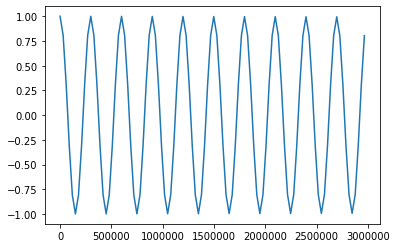

In [7]:
z = np.arange(0,10*lambd,lambd/10);
Ezp = np.exp(-alpha*z)*np.cos(-beta*z);
plt.plot(z, Ezp);